
Loading Dataset Analysis
Missing values: 348
Number of classes: 7
Images for class nv: 6705
Images for class mel: 1113
Images for class bkl: 1099
Images for class bcc: 514
Images for class akiec: 327
Images for class vasc: 142
Images for class df: 115
Dataset is balanced: False
Total number of images: 10015

Loading Random Images


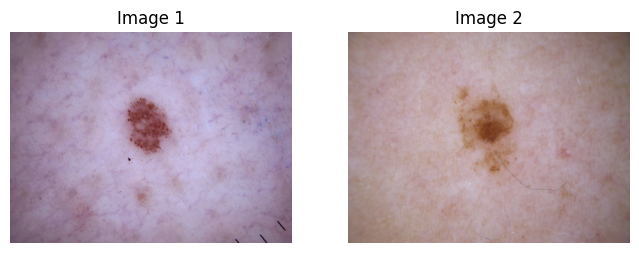


Loading Metadata Analysis

First few rows of the metadata:
+-------------+--------------+-----+---------+------+------+--------------+
|  lesion_id  |   image_id   | dx  | dx_type | age  | sex  | localization |
+-------------+--------------+-----+---------+------+------+--------------+
| HAM_0000118 | ISIC_0027419 | bkl |  histo  | 80.0 | male |    scalp     |
| HAM_0000118 | ISIC_0025030 | bkl |  histo  | 80.0 | male |    scalp     |
| HAM_0002730 | ISIC_0026769 | bkl |  histo  | 80.0 | male |    scalp     |
| HAM_0002730 | ISIC_0025661 | bkl |  histo  | 80.0 | male |    scalp     |
| HAM_0001466 | ISIC_0031633 | bkl |  histo  | 75.0 | male |     ear      |
+-------------+--------------+-----+---------+------+------+--------------+

Metadata Columns:
['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization']

Missing Values Per Column:
+--------------+----------------+
|    Column    | Missing Values |
+--------------+----------------+
|  lesion_id   |       0        |


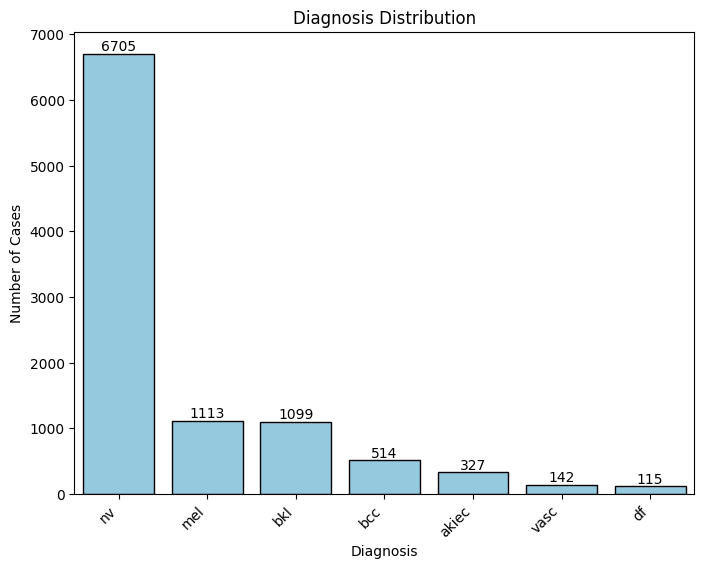

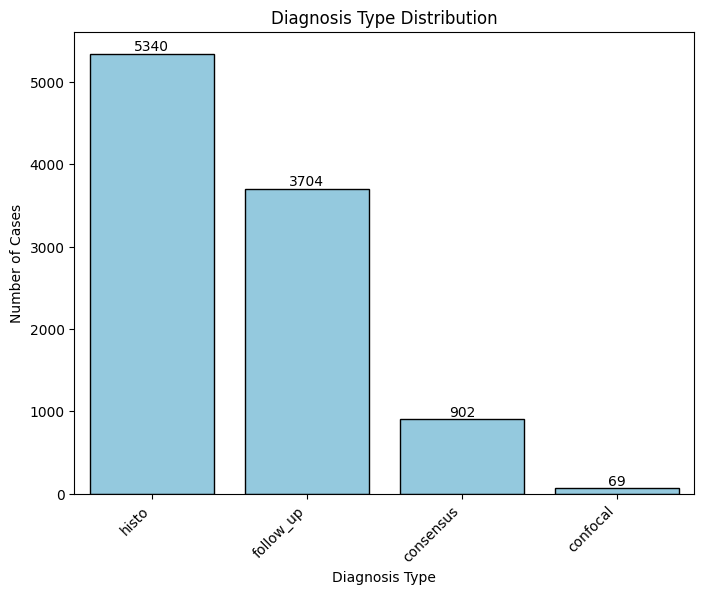

In [1]:
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
from tabulate import tabulate  

def analyze_ham10000(dataset_path):
    try:
        print("\nLoading Dataset Analysis")
        
        metadata_file = os.path.join(dataset_path, "HAM10000_metadata.csv")
        
        if not os.path.exists(metadata_file):
            print("Metadata file not found in the dataset directory.")
            return
        
        metadata = pd.read_csv(metadata_file)
        
        # Treat "unknown" as missing values
        metadata.replace("unknown", pd.NA, inplace=True)
        
        missing_values = metadata.isnull().sum().sum()
        print(f"Missing values: {missing_values}")
        
        class_column = "dx"
        class_counts = metadata[class_column].value_counts()
        
        print(f"Number of classes: {class_counts.nunique()}")
        for label, count in class_counts.items():
            print(f"Images for class {label}: {count}")
        
        avg_class_count = sum(class_counts.values) / class_counts.nunique()
        is_balanced = all(abs(count - avg_class_count) <= 0.1 * avg_class_count for count in class_counts.values)
        print(f"Dataset is balanced: {is_balanced}")
        
        image_folders = ["HAM10000_images_part_1", "HAM10000_images_part_2"]
        total_images = 0
        for folder in image_folders:
            folder_path = os.path.join(dataset_path, folder)
            if os.path.exists(folder_path):
                total_images += len([f for f in os.listdir(folder_path) if f.endswith('.jpg')])
        print(f"Total number of images: {total_images}")
    
    except Exception as e:
        print(f"Error: {e}")

def display_random_images(dataset_path, num_images=2):
    print("\nLoading Random Images")
    image_folders = ["HAM10000_images_part_1", "HAM10000_images_part_2"]
    image_files = []
    
    for folder in image_folders:
        folder_path = os.path.join(dataset_path, folder)
        if os.path.exists(folder_path):
            image_files.extend([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpg')])
    
    if len(image_files) < num_images:
        print(f"Not enough images in the directory. Found only {len(image_files)} images.")
        return
    
    selected_images = random.sample(image_files, num_images)
    
    plt.figure(figsize=(8, 4))
    
    for i, img_path in enumerate(selected_images):
        img = Image.open(img_path)
        
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image {i + 1}")
    
    plt.show()

def analyze_metadata(dataset_path):
    try:
        print("\nLoading Metadata Analysis")
        meta_file = os.path.join(dataset_path, "HAM10000_metadata.csv")
        
        if not os.path.exists(meta_file):
            print("Metadata file not found.")
            return
        
        metadata = pd.read_csv(meta_file)
        
        # Print the first few rows of the metadata
        print("\nFirst few rows of the metadata:")
        print(tabulate(metadata.head(), headers='keys', tablefmt='pretty', showindex=False))
        
        # Print the metadata columns
        print("\nMetadata Columns:")
        print(metadata.columns.tolist())
        
        # Treat "unknown" as missing values
        metadata.replace("unknown", pd.NA, inplace=True)
        
        missing_values = metadata.isnull().sum()
        print("\nMissing Values Per Column:")
        print(tabulate(missing_values.items(), headers=["Column", "Missing Values"], tablefmt="pretty"))
        
        plot_titles = {
            "dx": "Diagnosis Distribution",
            "dx_type": "Diagnosis Type Distribution"
        }
        
        x_labels = {
            "dx": "Diagnosis",
            "dx_type": "Diagnosis Type"
        }
        
        for col, title in plot_titles.items():
            if col in metadata.columns:
                plt.figure(figsize=(8, 6))
                ax = sns.countplot(x=metadata[col], order=metadata[col].value_counts().index, color='skyblue', edgecolor='black')
                
                for p in ax.patches:
                    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                                ha='center', va='bottom', fontsize=10, color='black')
                
                plt.xticks(rotation=45, ha='right')
                plt.title(title)
                plt.xlabel(x_labels[col])
                plt.ylabel("Number of Cases")
                plt.show()
    
    except Exception as e:
        print(f"Error: {e}")

      
# Specify dataset path
dataset_path = "/kaggle/input/skin-cancer-mnist-ham10000/"

# Run analysis
analyze_ham10000(dataset_path)
display_random_images(dataset_path, num_images=2)
analyze_metadata(dataset_path)



Cleaning Metadata

Cleaned metadata saved to: /kaggle/working/HAM10000_metadata_cleaned.csv

Missing Values Per Column:
+--------------+----------------+
|    Column    | Missing Values |
+--------------+----------------+
|  lesion_id   |       0        |
|   image_id   |       0        |
|      dx      |       0        |
|   dx_type    |       0        |
|     age      |       0        |
|     sex      |       0        |
| localization |       0        |
+--------------+----------------+

Plotting Graphs


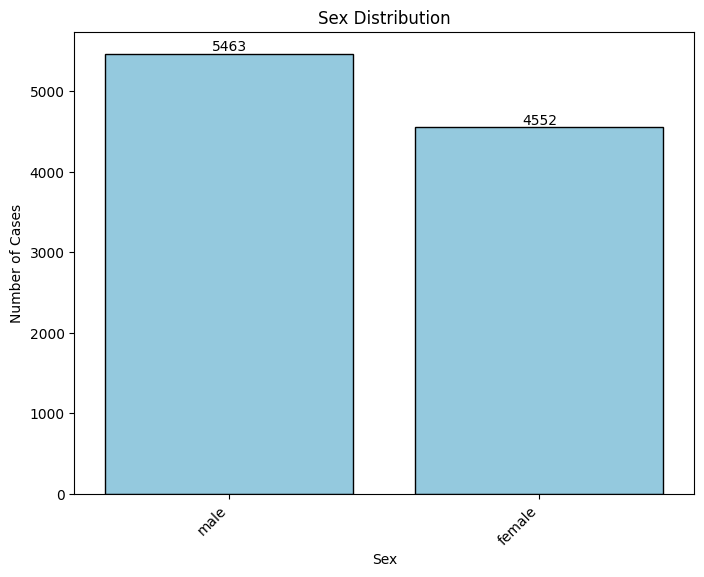

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


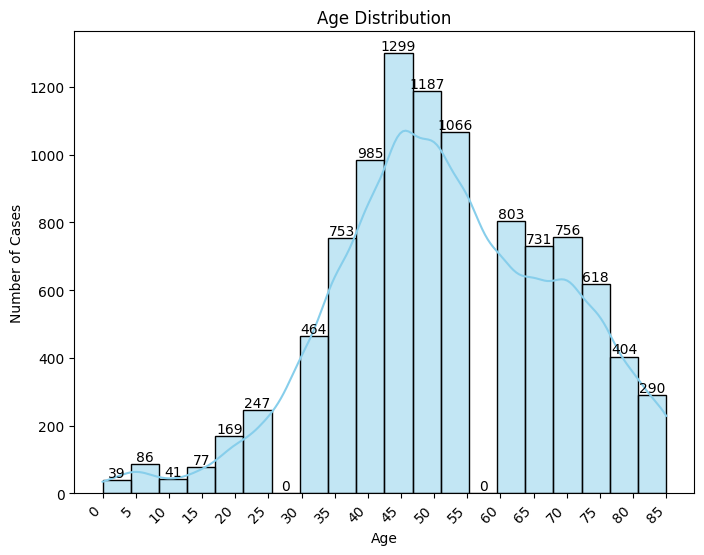

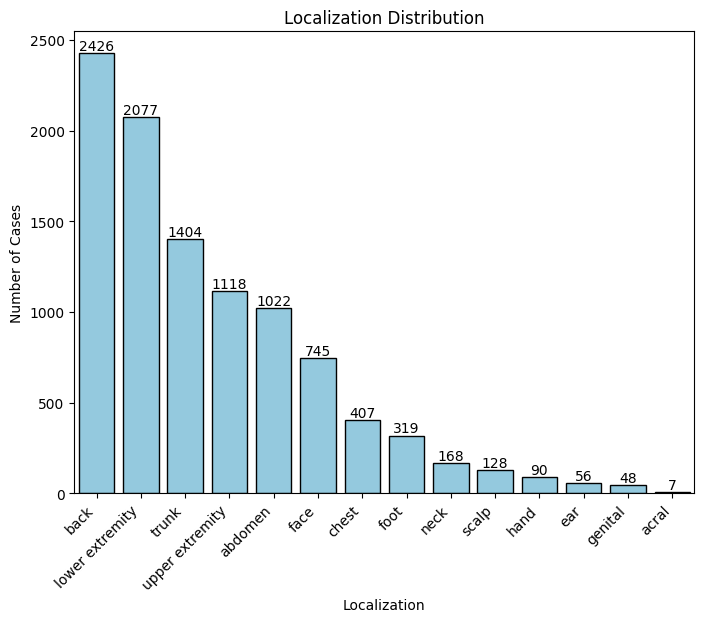

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

def clean_and_plot_metadata(dataset_path, save_path="/kaggle/working/"):
    try:
        print("\nCleaning Metadata")
        meta_file = os.path.join(dataset_path, "HAM10000_metadata.csv")
        
        if not os.path.exists(meta_file):
            print("Metadata file not found.")
            return None
        
        metadata = pd.read_csv(meta_file)
        
        # Clean the metadata
        metadata_cleaned = metadata.copy()
        
        # Fill missing values for 'sex' and 'localization' with mode and handle 'unknown' values
        metadata_cleaned['sex'] = metadata_cleaned['sex'].fillna(metadata_cleaned['sex'].mode()[0])
        metadata_cleaned['localization'] = metadata_cleaned['localization'].fillna(metadata_cleaned['localization'].mode()[0])
        
        # Replace 'unknown' with NaN in 'sex' and 'localization' and then fill these with mode
        metadata_cleaned['sex'] = metadata_cleaned['sex'].replace("unknown", pd.NA)
        metadata_cleaned['localization'] = metadata_cleaned['localization'].replace("unknown", pd.NA)
        metadata_cleaned['sex'] = metadata_cleaned['sex'].fillna(metadata_cleaned['sex'].mode()[0])
        metadata_cleaned['localization'] = metadata_cleaned['localization'].fillna(metadata_cleaned['localization'].mode()[0])
        
        # For 'age', fill missing values with the mean
        metadata_cleaned['age'] = pd.to_numeric(metadata_cleaned['age'], errors='coerce')  
        metadata_cleaned['age'] = metadata_cleaned['age'].fillna(metadata_cleaned['age'].mean())
        
        # Save the cleaned metadata 
        csv_path = os.path.join(save_path, "HAM10000_metadata_cleaned.csv")
        metadata_cleaned.to_csv(csv_path, index=False)
        print(f"\nCleaned metadata saved to: {csv_path}")
        
        # Reporting missing values 
        missing_values = metadata_cleaned.isnull().sum()
        print("\nMissing Values Per Column:")
        print(tabulate(missing_values.items(), headers=["Column", "Missing Values"], tablefmt="pretty"))
        
        # Plotting graph
        print("\nPlotting Graphs")

        plot_titles = {
            "sex": "Sex Distribution",
            "age": "Age Distribution",
            "localization": "Localization Distribution"
        }
        
        x_labels = {
            "sex": "Sex",
            "age": "Age",
            "localization": "Localization"
        }
        
        
        for col, title in plot_titles.items():
            plt.figure(figsize=(8, 6))
            
            if col == "age":
               
                ax = sns.histplot(metadata_cleaned[col], bins=20, kde=True, color='skyblue', edgecolor='black')
                
               
                ax.set_xticks(range(0, int(metadata_cleaned['age'].max())+5, 5))  
                
                # Annotate the bars with the count values
                for p in ax.patches:
                    ax.annotate(f'{int(p.get_height())}', 
                                (p.get_x() + p.get_width() / 2, p.get_height()),
                                ha='center', va='bottom', fontsize=10, color='black')
            
            else:
                # For categorical columns 
                ax = sns.countplot(x=metadata_cleaned[col], order=metadata_cleaned[col].value_counts().index, color='skyblue', edgecolor='black')
                
                for p in ax.patches:
                    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                                ha='center', va='bottom', fontsize=10, color='black')
            
            #  graph formatting
            plt.title(title)
            plt.xlabel(x_labels[col])
            plt.ylabel("Number of Cases")
            plt.xticks(rotation=45, ha='right')
            plt.show()

        return metadata_cleaned
    
    except Exception as e:
        print(f"Error: {e}")
        return None

# Specify dataset path
dataset_path = "/kaggle/input/skin-cancer-mnist-ham10000/"
save_path = "/kaggle/working/"

# Run the function 
cleaned_metadata = clean_and_plot_metadata(dataset_path, save_path)
